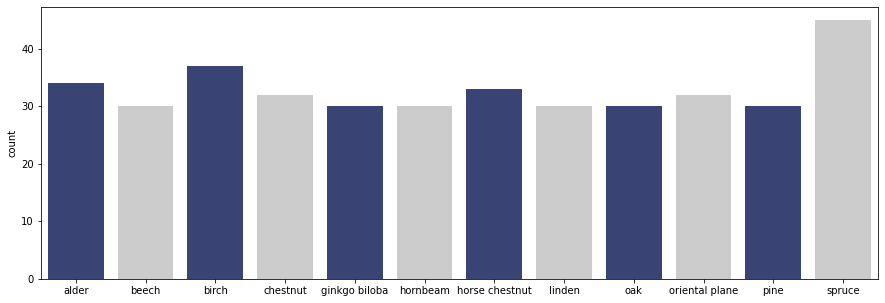

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# initalizing variables
data_dir = '../data/trunk12'
batch_size = 32
split_ratio = 0.9

# specify transformation functions to apply on each image
transform = transforms.Compose([transforms.ToTensor()])

# read images from the dataset directory
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
total_num = len(dataset.targets)
train_num = int(split_ratio * total_num)
val_num = total_num - train_num

plt.figure(figsize=[15, 5])
p = sns.countplot(dataset.targets, palette=['#2F3C7E', '#CCCCCC'])
p.set_xticklabels(dataset.classes);

In [3]:
# split the images into train and test set
train_dataset, test_dataset = torch.utils.data.random_split(dataset,[train_num, val_num])

# generate a dataloader for the train set
train_loader = torch.utils.data.DataLoader(train_dataset.dataset,
                                            batch_size=batch_size,
                                            shuffle=True)

# generate a dataloader for the test set
test_loader = torch.utils.data.DataLoader(test_dataset.dataset,
                                            batch_size=batch_size,
                                            shuffle=True)

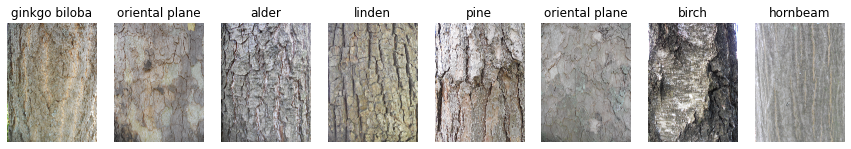

In [4]:
# show multiple examples of images from the training set
train_batch = next(iter(train_loader))

n = 8
plt.figure(figsize=[15,5])
for i in range(n):
    img = train_batch[0][i]
    img = torch.permute(img, (1,2,0))
    target = dataset.classes[train_batch[1][i].item()]
    plt.subplot(1,n,i+1)
    plt.imshow(img)
    plt.title(target)
    plt.axis('off')
plt.show()
